# **k-Plus Proches Voisins**

Documentation Sci-kit Learn sur les k-Nearest Neighbours : https://scikit-learn.org/stable/modules/neighbors.html

# Méthodes des plus proches voisins

Le principe des méthodes des plus proches voisins est de trouver un nombre prédéfini d'échantillons d'entraînement les plus proches en distance d'un nouveau point, puis de prédire son étiquette à partir de ces échantillons. Le nombre d'échantillons peut être une constante définie par l'utilisateur (**apprentissage des k plus proches voisins**) ou varier en fonction de la densité locale des points (**apprentissage basé sur un rayon**). La distance utilisée peut être toute mesure métrique ; la distance euclidienne standard est le choix le plus courant.

Les méthodes basées sur les voisins sont connues comme des méthodes d'apprentissage non généralisantes, car elles « mémorisent » simplement toutes les données d'entraînement.

Malgré sa simplicité, l'algorithme des plus proches voisins a été utilisé avec succès dans de nombreux problèmes de classification et de régression, notamment la reconnaissance de chiffres manuscrits et l'analyse d'images satellites. Étant une méthode non paramétrique, elle est souvent efficace dans des situations où la frontière de décision est très irrégulière.

![K-Nearest Neighbours](https://scikit-learn.org/stable/_images/sphx_glr_plot_nca_classification_001.png)

# Importer les librairies

# Importer le jeu de données

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt # visualisation des données
import pandas as pd  # traitement des données (ex: lecture de fichiers CSV)
import seaborn as sns # visualisation des données

In [2]:
# importer le jeu de données du cancer du sein avec sklearn
breast_cancer = load_breast_cancer(as_frame=True)
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Jeu de données vers DataFrame Pandas

In [3]:
# Mettre  dans un dataframe pandas avec la variable cible (que nous essaierons de prédire) comme dernière colonne
df_breast_cancer = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df_breast_cancer['target'] = breast_cancer.target

In [4]:
# Les 10 premières valeurs du jeu de données
df_breast_cancer.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


# Analyse exploratoire des données

In [5]:
# Forme du jeu de données (nb de lignes et de colonnes)
print(df_breast_cancer.shape)

# Nom des colonnes
print(df_breast_cancer.columns)

(569, 31)
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


In [6]:
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
# Description du jeu de données Iris (moyenne, écart-type, min, max, quartiles)
display(df_breast_cancer.describe())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Distribution de fréquence des valeurs dans les variables catégorielles

In [8]:
# Noms des valeurs cibles + saut de ligne
print(breast_cancer.target_names, "\n")

# Nombre pour chaque valeur cible
print(df_breast_cancer['target'].value_counts(), "\n")

# Comme ci-dessus mais en pourcentage
print(df_breast_cancer['target'].value_counts(normalize=True), "\n")

['malignant' 'benign'] 

target
1    357
0    212
Name: count, dtype: int64 

target
1    0.627417
0    0.372583
Name: proportion, dtype: float64 



Nous pouvons voir que le jeu de données est équilibré en termes de classes.

### Valeurs manquantes dans les variables

In [9]:
# Matrice de corrélation entre toutes les caractéristiques
df_breast_cancer.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


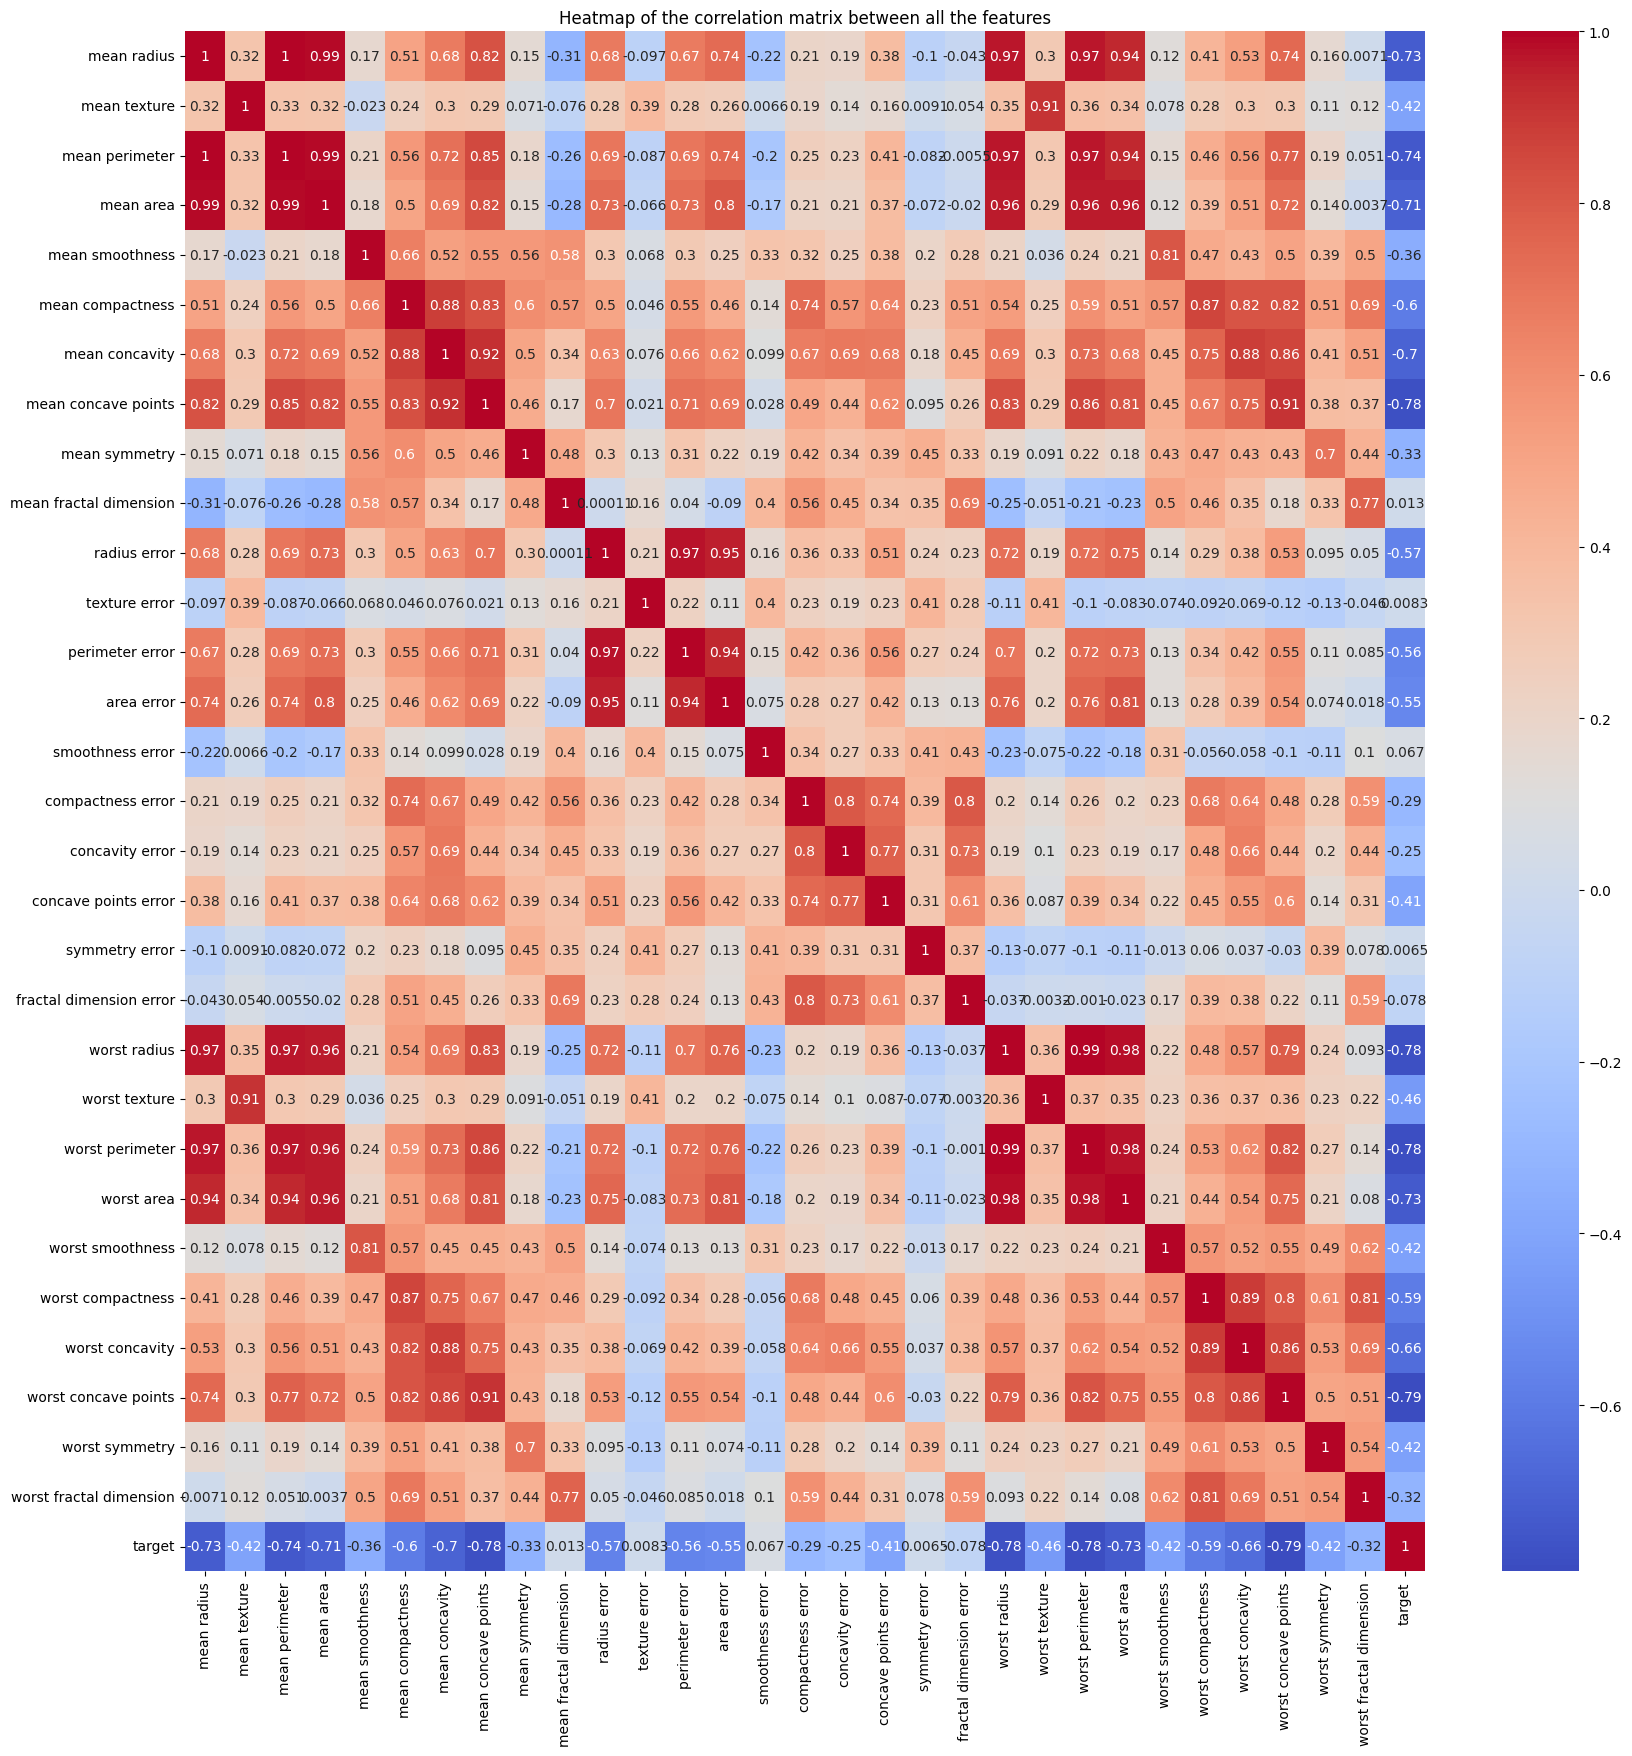

In [10]:
# Heatmap de la matrice de corrélation
plt.figure(figsize=(20, 20))
plt.title("Heatmap of the correlation matrix between all the features")
# Annot = True pour afficher les valeurs à l'intérieur du carré
sns.heatmap(df_breast_cancer.corr(), annot=True, cmap='coolwarm')
plt.show()

In [11]:
# afficher les variables les plus corrélées avec la variable cible (valeur absolue)
print(df_breast_cancer.corr()['target'].abs().sort_values(ascending=False))

target                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

### Tracer quelques données

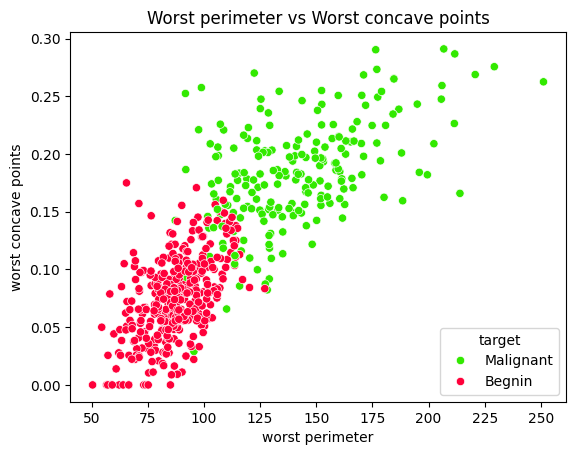

In [26]:
# conversion des données en catégories
df_breast_cancer["target"] = df_breast_cancer["target"].map({
    0: "Malignant",
    1: "Begnin",
})

# Tracer les 2 caractéristiques les plus corrélées avec la variable cible
sns.scatterplot(x='worst perimeter', y='worst concave points',
                data=df_breast_cancer, hue='target', palette='prism')
plt.title("Worst perimeter vs Worst concave points")
plt.show()

# reconversion des données en numérique

df_breast_cancer["target"] = df_breast_cancer["target"].map({
    "Malignant": 0,
    "Begnin": 1,
})

# Diviser les données en ensembles d'entraînement et de test séparés

In [13]:
# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df_breast_cancer.drop('target', axis=1), df_breast_cancer['target'], test_size=0.2, random_state=1)

In [14]:
# Vérifier les dimensions
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(455, 30) (114, 30)
(455,) (114,)


In [15]:
print(y_train.value_counts())
print(y_test.value_counts())

target
1    285
0    170
Name: count, dtype: int64
target
1    72
0    42
Name: count, dtype: int64


# Encodage des données

In [16]:
# vérifier les types de données dans X_train
X_train.dtypes


mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

Toutes les données sont numériques, nous n'avons donc pas besoin de faire d'encodage.

# Classifieur K-Plus Proches Voisins

<!-- Add an image link in markdown in a smaller size: -->
![knn](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png) 

In [17]:
# Créer un classifieur KNN avec 8 voisins
model = KNeighborsClassifier(n_neighbors=8)
# Entraîner le modèle en utilisant les ensembles d'entraînement
model.fit(X_train, y_train)

# Précision du modèle sur l'ensemble d'entraînement
print(model.score(X_train, y_train))

0.9340659340659341


In [18]:
# Prédire la réponse pour l'ensemble de test
predict = model.predict(X_test)

# Précision du modèle sur l'ensemble de test
print(accuracy_score(predict, y_test))

0.9473684210526315


## Tracer la précision du modèle sur l'ensemble d'entraînement et de test pour différents k voisins

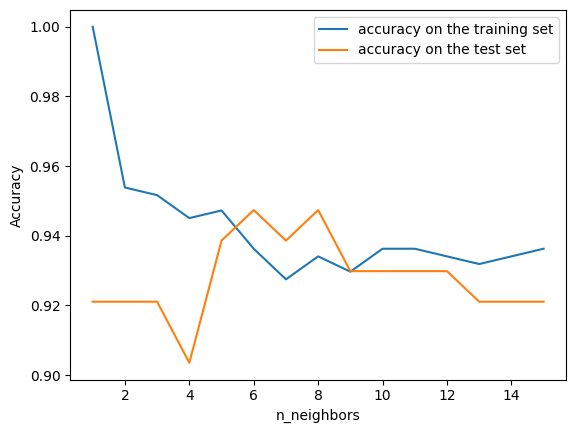

In [19]:
training_accuracy = []
test_accuracy = []
# essayer n_neighbors de 1 à 15
neighbors_settings = range(1, 16)
for n_neighbors in neighbors_settings:
    # construire le modèle
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    # enregistrer la précision de l'entraînement
    training_accuracy.append(model.score(X_train, y_train))
    # enregistrer la précision de généralisation
    test_accuracy.append(model.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="accuracy on the training set")
plt.plot(neighbors_settings, test_accuracy, label="accuracy on the test set")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

Nous pouvons voir que la précision du modèle est la plus élevée lorsque k=1. C'est parce que le modèle surapprend sur l'ensemble d'entraînement. La précision du modèle sur l'ensemble de test est la plus élevée lorsque k=8. C'est parce que le modèle généralise bien.

# Rapport de classification

**Le rapport de classification** est un autre moyen d'évaluer les performances du modèle de classification. Il affiche les scores de **précision**, **rappel**, **f1** et **support** pour le modèle. J'ai décrit ces termes plus loin.

Nous pouvons afficher un rapport de classification comme suit :-

In [20]:
# Tracer le rapport de classification pour k=8
print(classification_report(y_test, predict, target_names=breast_cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.95      0.90      0.93        42
      benign       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



# Matrice de confusion

Une matrice de confusion aide à résumer les performances d'un algorithme de classification. Elle donne une image claire de la performance d'un modèle de classification ainsi que des types d'erreurs produites par celui-ci. <br>
Elle donne un résumé des prédictions correctes et incorrectes réparties par catégorie. 


Quatre types de résultats sont possibles lors de l'évaluation des performances d'un modèle de classification :


**Vrais Positifs (VP)** – Nous prédisons qu'une observation appartient à une certaine classe *x* et l'observation appartient effectivement à cette classe *x*.


**Vrais Négatifs (VN)** – Nous prédisons qu'une observation n'appartient pas à une certaine classe *x* et l'observation n'appartient effectivement pas à cette classe *x*.


**Faux Positifs (FP)** – Nous prédisons qu'une observation appartient à une certaine classe *x* mais l'observation **n'appartient pas** à cette classe *x*. Ce type d'erreur est appelé erreur de Type I.



**Faux Négatifs (FN)** – Nous prédisons qu'une observation n'appartient pas à une certaine classe *x* mais l'observation **appartient effectivement** à cette classe *x*. C'est une erreur très grave appelée erreur de Type II.



Confusion Matrice for K=8:


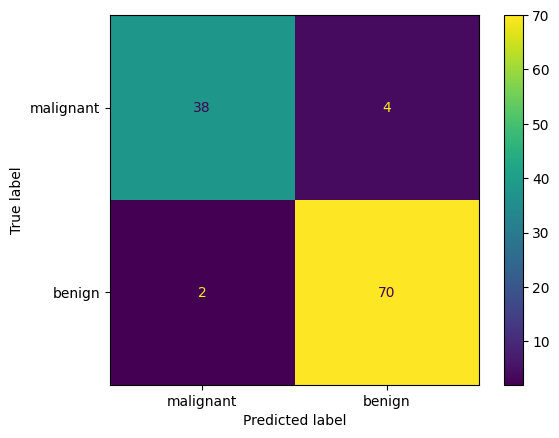

In [21]:
print("Confusion Matrice for K=8:")
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast_cancer.target_names)
disp.plot()
plt.show()

# Validation croisée 

In [22]:
# Validation croisée avec 5 découpes différentes
scores = cross_val_score(model, df_breast_cancer.drop('target', axis=1), df_breast_cancer['target'], cv=5)
print("Cross-validation scores: {}".format(scores))
print("Mean cross-validation score: {:.2f}".format(scores.mean()))
print("Standard deviation of cross-validation score: {:.2f}".format(scores.std()))

Cross-validation scores: [0.86842105 0.93859649 0.93859649 0.95614035 0.94690265]
Mean cross-validation score: 0.93
Standard deviation of cross-validation score: 0.03


# ROC et AUC

La courbe ROC est une courbe de probabilité et l'AUC représente le degré ou la mesure de séparabilité. Elle indique à quel point le modèle est capable de distinguer les classes. Plus l'AUC est élevé, meilleur est le modèle pour prédire les 0 comme des 0 et les 1 comme des 1. Par analogie, plus l'AUC est élevé, meilleur est le modèle pour distinguer les patients malades des patients sains.

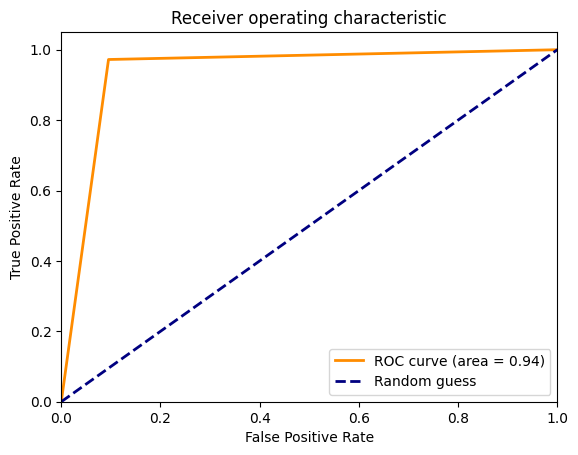

In [23]:
# Caractéristique de Fonctionnement du Récepteur (ROC) et Aire Sous la Courbe (AUC)
fpr, tpr, thresholds = roc_curve(y_test, predict)
roc_auc = auc(fpr, tpr)
plt.figure()

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Frontière de Décision

Les frontières de décision montrent les régions de décision du classifieur. C'est une ligne ou une courbe qui sépare les régions de décision du classifieur.

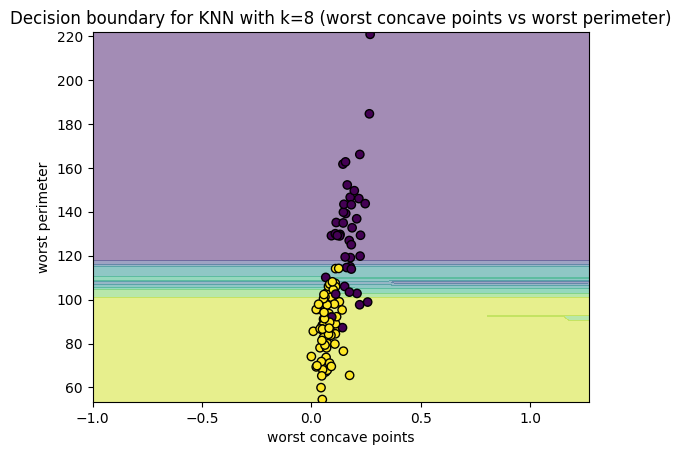

In [24]:
# Afficher la frontière de décision pour le classifieur KNN sur les caractéristiques les plus corrélées

# Frontière de décision pour 'worst concave points' vs 'worst perimeter'
X_train_boundary = X_train[['worst concave points', 'worst perimeter']].values
X_test_boundary = X_test[['worst concave points', 'worst perimeter']].values

knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_classifier.fit(X_train_boundary, y_train)

disp = DecisionBoundaryDisplay.from_estimator(knn_classifier, X_test_boundary, xlabel='worst concave points',
                                              ylabel='worst perimeter', alpha=0.5)
disp.ax_.scatter(X_test_boundary[:, 0], X_test_boundary[:, 1], c=y_test, edgecolor="k")
plt.title("Decision boundary for KNN with k=8 (worst concave points vs worst perimeter)")
plt.show()

# Analyse en Composantes Principales

L'Analyse en Composantes Principales est une technique de réduction de dimensionnalité. Elle est utilisée pour réduire le nombre de caractéristiques dans un jeu de données. Elle sert à réduire la complexité du modèle et le temps d'entraînement. Elle est également utilisée pour visualiser des données de haute dimension.

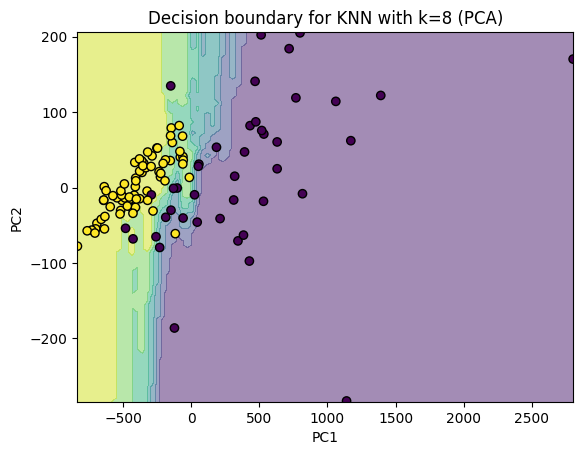

In [25]:
pca = PCA(n_components=2) # 2 composantes principales pour un tracé 2D
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_classifier.fit(X_train_pca, y_train)

disp = DecisionBoundaryDisplay.from_estimator(knn_classifier, X_test_pca, xlabel='PC1',
                                              ylabel='PC2', alpha=0.5)
disp.ax_.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolor="k")
plt.title("Decision boundary for KNN with k=8 (PCA)")
plt.show()

# Références : 
1. https://scikit-learn.org/
2. https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
3. https://www.kaggle.com/code/prashant111/knn-classifier-tutorial